In [1]:
!pip install torch

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x
    

In [5]:
# Pick manual seed for randomization
torch.manual_seed(41)

In [6]:
# model instance
model = Model()

In [58]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

my_df['species'][50]

'versicolor'

In [60]:
my_df['species'] = my_df['species'].replace('setosa',0)
my_df['species'] = my_df['species'].replace('versicolor',1)
my_df['species'] = my_df['species'].replace('virginica',2)

my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [61]:
#Train test split
x = my_df.drop('species', axis=1)
y = my_df['species']
x = x.values
y = y.values
x,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [62]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=41)

In [63]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
x_train, x_test

(tensor([[5.7000, 2.6000, 3.5000, 1.0000],
         [6.5000, 2.8000, 4.6000, 1.5000],
         [4.9000, 2.5000, 4.5000, 1.7000],
         [5.5000, 2.6000, 4.4000, 1.2000],
         [6.7000, 3.0000, 5.2000, 2.3000],
         [5.8000, 4.0000, 1.2000, 0.2000],
         [6.9000, 3.1000, 5.1000, 2.3000],
         [6.4000, 3.2000, 4.5000, 1.5000],
         [6.9000, 3.1000, 5.4000, 2.1000],
         [5.9000, 3.2000, 4.8000, 1.8000],
         [6.2000, 2.9000, 4.3000, 1.3000],
         [5.7000, 2.8000, 4.5000, 1.3000],
         [5.2000, 4.1000, 1.5000, 0.1000],
         [6.5000, 3.0000, 5.8000, 2.2000],
         [6.3000, 3.4000, 5.6000, 2.4000],
         [5.7000, 3.8000, 1.7000, 0.3000],
         [6.7000, 2.5000, 5.8000, 1.8000],
         [5.1000, 2.5000, 3.0000, 1.1000],
         [4.8000, 3.0000, 1.4000, 0.3000],
         [6.2000, 2.2000, 4.5000, 1.5000],
         [6.4000, 2.7000, 5.3000, 1.9000],
         [5.8000, 2.7000, 3.9000, 1.2000],
         [7.4000, 2.8000, 6.1000, 1.9000],
         [5

In [64]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
y_train, y_test

(tensor([1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 0,
         0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2,
         0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1,
         2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2,
         0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2]),
 tensor([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0,
         1, 1, 1, 1, 0, 1]))

In [68]:
# measure error
loss_function = nn.CrossEntropyLoss()
# Adam optimizer, learning_rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [74]:
# Train our model
epochs = 100
losses = []
for i in range (epochs):
    # Go forward and get prediction
    y_pred = model.forward(x_train) # get predicted results

    #calculate loss 
    loss = loss_function(y_pred,y_train)

    losses.append(loss.detach().numpy())

    ##print
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')

    # Do some backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

Epoch: 0 and loss: 1.1145514249801636
Epoch: 10 and loss: 0.8762577176094055
Epoch: 20 and loss: 0.5591720342636108
Epoch: 30 and loss: 0.4078424870967865
Epoch: 40 and loss: 0.3235296308994293
Epoch: 50 and loss: 0.20978395640850067
Epoch: 60 and loss: 0.11317721754312515
Epoch: 70 and loss: 0.06799598038196564
Epoch: 80 and loss: 0.04859676584601402
Epoch: 90 and loss: 0.03953542932868004


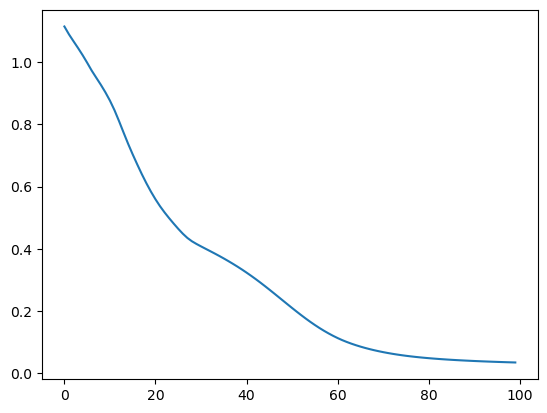

In [76]:
plt.plot(range(epochs),losses)

In [77]:
# Evaludate Model on Test Data Set
with torch.no_grad():
    y_eval = model.forward(x_test)
    loss = loss_function(y_eval,y_test)

In [78]:
loss

tensor(0.1381)

In [95]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(x_test):
        y_val = model(data)

        #print(f'{i+1}.) {str(y_val)} \t {y_test[i]}')

        if y_val.argmax().item() == y_test[i]:
            correct+=1

print(f'We have got {correct} correct!')

We have got 28 correct!


In [99]:
new_iris = torch.tensor([5.6000, 3.0000, 4.1000, 1.3000])

In [100]:
with torch.no_grad():
    print(model.forward(new_iris).argmax())

tensor(1)


In [101]:
# save our NN model
torch.save(model.state_dict(), 'My_NN.pt')

In [103]:
# load saved model

new_model = Model()
new_model.load_state_dict(torch.load('My_NN.pt'))

<All keys matched successfully>

In [104]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [105]:
print(new_model.fc1.weight)

Parameter containing:
tensor([[ 0.5068, -0.1925,  0.4405,  1.1132],
        [-0.5883, -0.0695,  0.8693,  1.0409],
        [-0.3412,  0.1535, -0.4516, -0.2578],
        [ 0.2841,  0.8439, -0.2534, -0.1353],
        [ 0.0625, -0.4663,  0.9474,  0.2594],
        [-0.1538, -0.1301,  0.1995, -0.2146],
        [-0.2835,  0.1316,  0.9459,  0.9678],
        [ 0.8758,  0.4000, -0.5613, -1.0958]], requires_grad=True)
